### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize']=(9,6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")


    2- Loading data into Panda datafram, name it insta_df 
        * load only the first 2000 rows using the "nrows" parameter

#### Note:reading  just the 2000 examples of the data.

Otherwise,execution time for each command will be long since the data has 178922 samples.

In [2]:


insta_df=pd.read_csv('Instagram_Data.csv',nrows=2000)

##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- The 10 first rows of the data, its shape, and the coulmens names:

In [3]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [4]:
# insta_df shape
insta_df.shape

(2000, 13)

In [5]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Checking the number of samples in the dataset 

In [6]:
# insta_df row numbers:
num_samples=insta_df.shape[0]
print('Number of samples in the dataset are {}'.format(num_samples))


Number of samples in the dataset are 2000


    5- Check the data type of each column 

In [7]:
# Print datatypes
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Removeing columns from the dataframe:

        a. Removing user id from the insta_df as there is no useful information from this column. 

        b. Removing the Likes Score since it is calculated from the number of likes. 

        c. Removing the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes 

In [8]:

insta_df.drop('User uuid',axis=1,inplace=True)



insta_df.drop('Likes Score',axis=1,inplace=True)


insta_df.drop(columns=['Date Posted', 'Year', 'Month','Day', 'Hour', 'Minute'],axis=1,inplace=True)


insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Checking how many unique values are on the "Type" column using unique() function 

In [9]:

insta_df['Type'].value_counts()

Type
Image     1372
Images     442
Video      186
Name: count, dtype: int64

In [10]:
insta_df['Type'].nunique()

3

- There are three 3 unique values on the 'Type' column 

    8- Using  label encoder to change the "Type" coulmn values to numeric values

In [11]:
# Encode "Type"


label_encoder=LabelEncoder()

insta_df['Type']=label_encoder.fit_transform(insta_df['Type'])

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column:

        a. How many NaNs as total 

        b. How many NaNs as a percentage of overall data 

In [12]:
# a. NaNs as total
insta_df.isnull().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

In [13]:
# b. NaNs as a percentage of overall data
round(100*(insta_df.isnull().sum()/len(insta_df)),2)

Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
dtype: float64

    10- Dividing the data into features (X), and target (y)

In [14]:
# featuers X:
X=insta_df.drop('Likes',axis=1)
##

X.head()

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0


In [15]:
X.shape

(2000, 4)

In [16]:
# target y:
y=insta_df['Likes']
##
y.head()

0    506
1    385
2    373
3    312
4    513
Name: Likes, dtype: int64

In [17]:
y.shape

(2000,)

    11- Checking for Multicollinearity for features (X) using a correlation matrix. 

In [18]:
# write your code here:
correlation=X.corr()
correlation

,Days passed from post,Type,Numer of Tags,Numer of Comments
Days passed from post,1.000000,-0.146155,-0.170063,-0.115434
Type,-0.146155,1.000000,-0.013724,0.002244
Numer of Tags,-0.170063,-0.013724,1.000000,0.053189
Numer of Comments,-0.115434,0.002244,0.053189,1.000000


c:\Users\joths\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


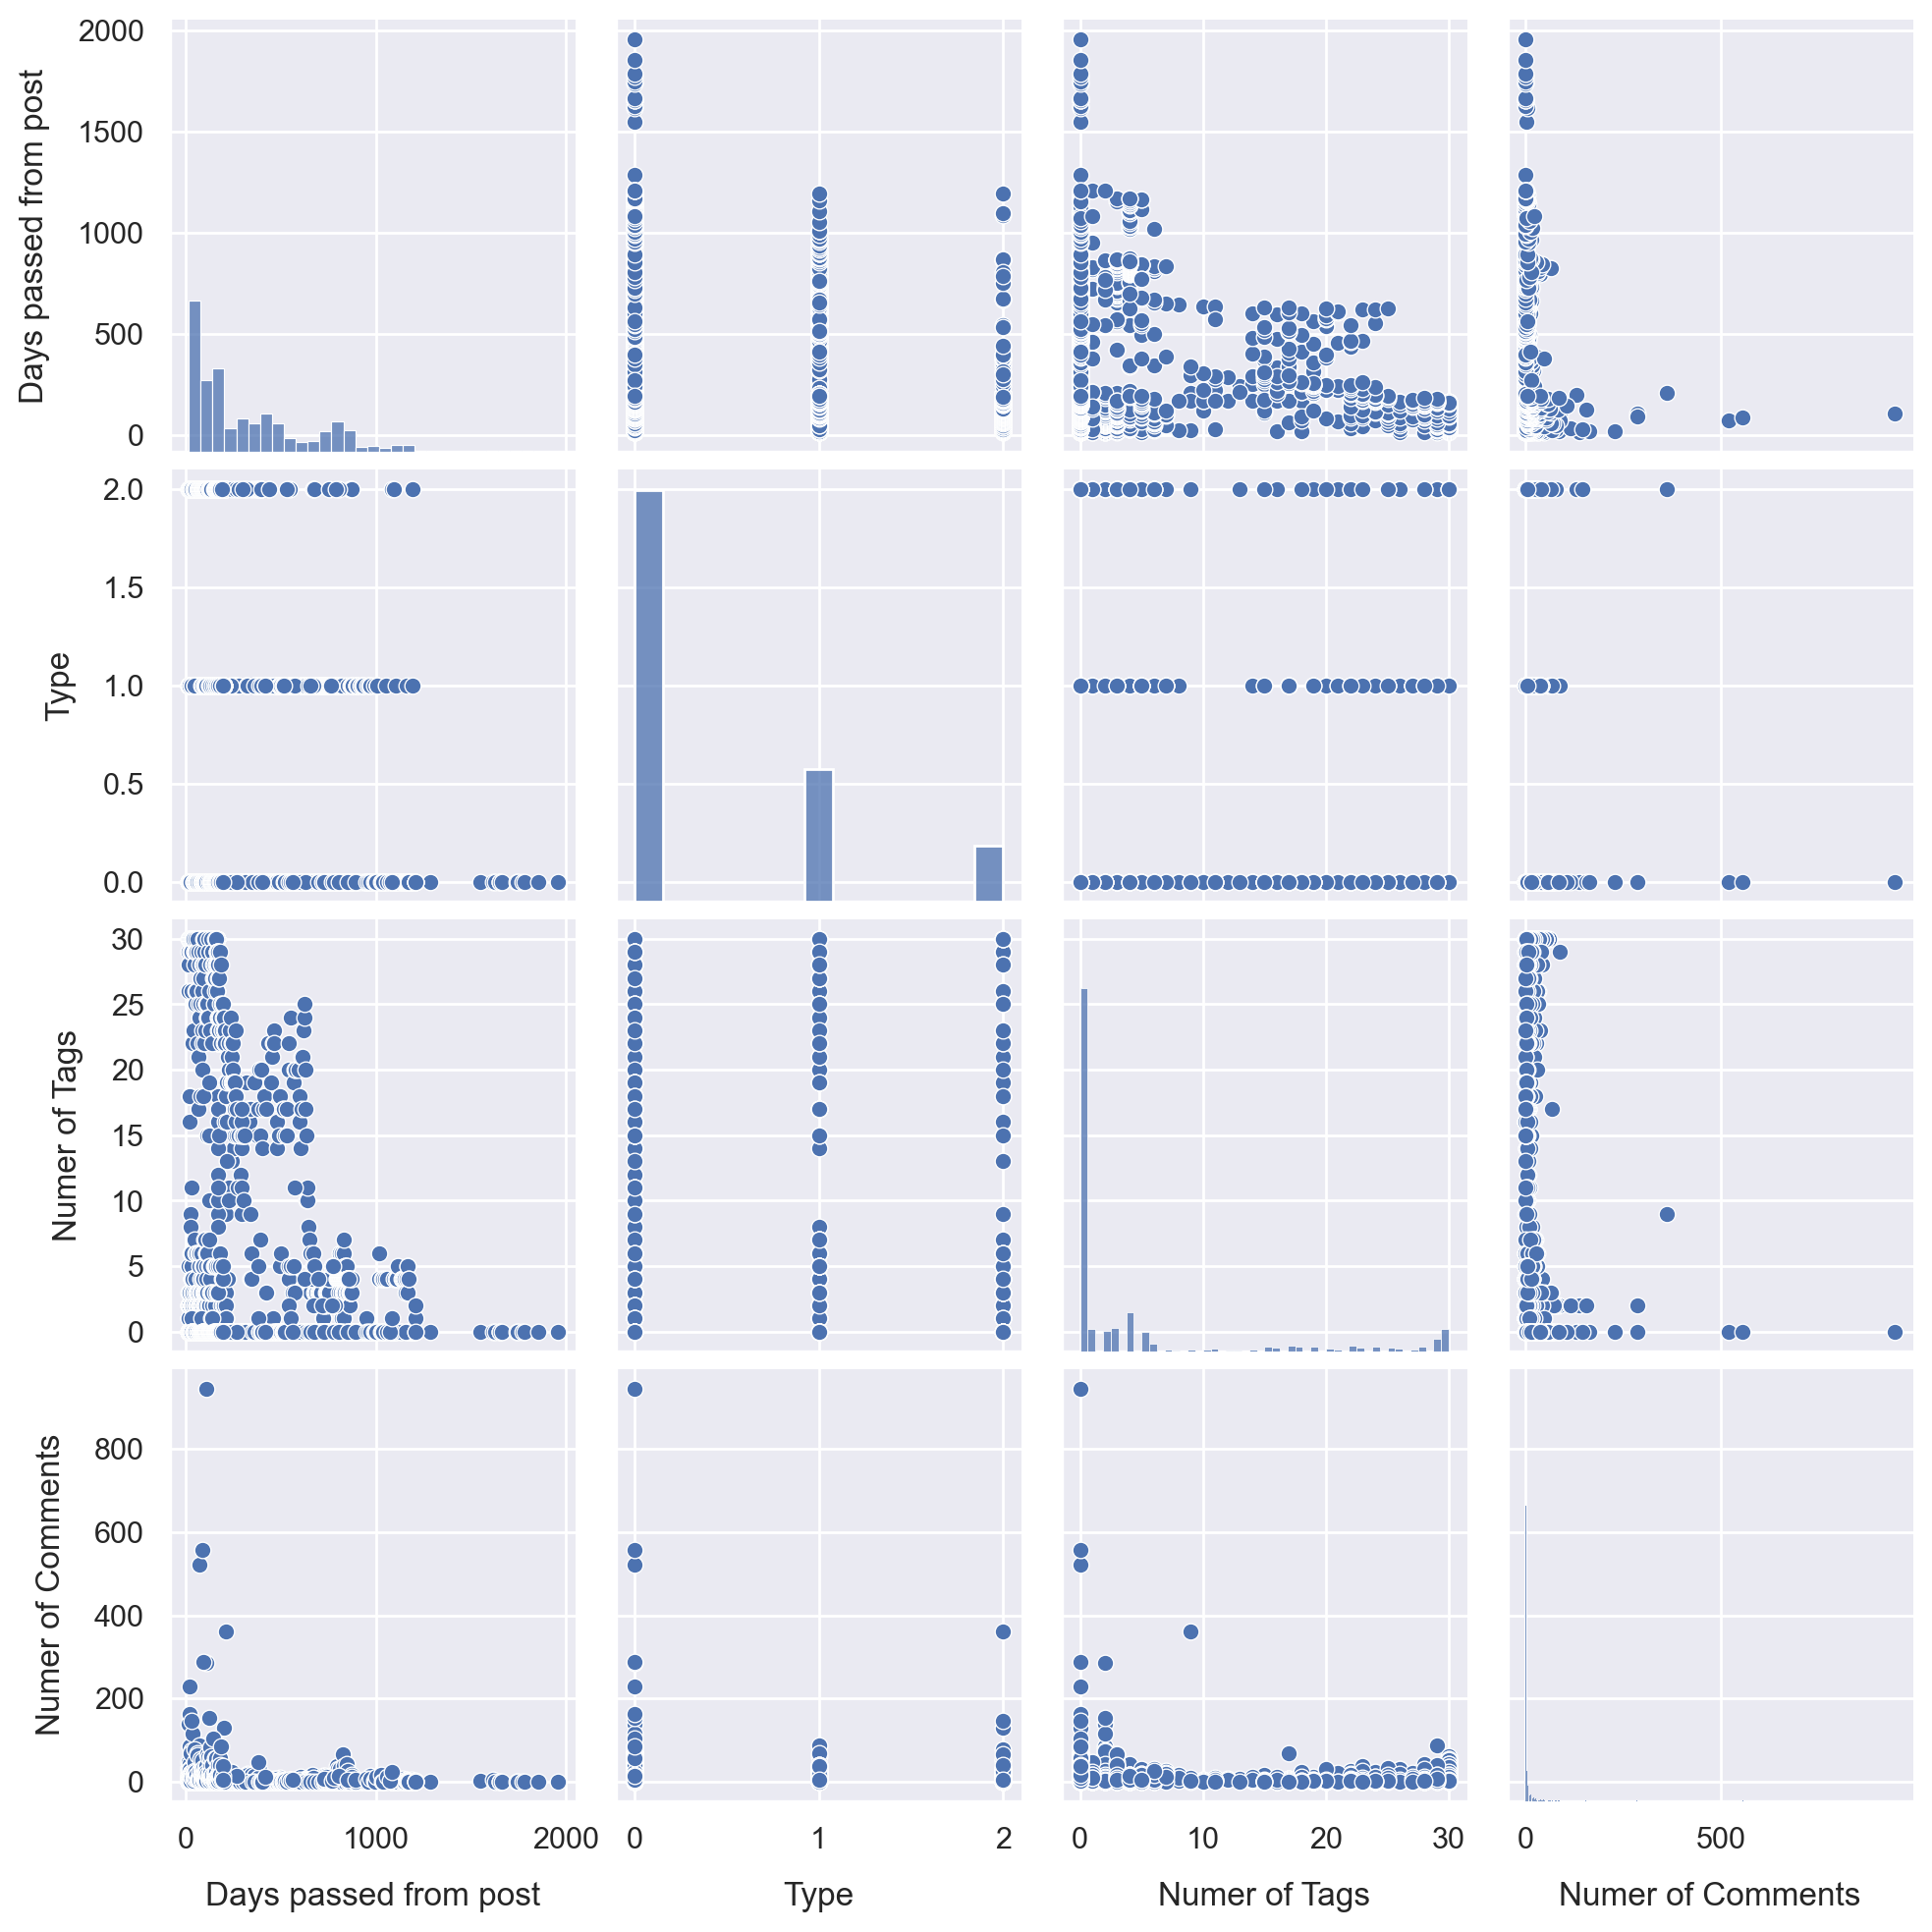

In [19]:
sns.pairplot(data=X)
plt.show()

    12- From the above pairplot,

- There is no correlation between the features.

- Hence, no multicollinearity problem.

    13- Using a scatter plot to check each feature's relationship with the target variable, Likes. 

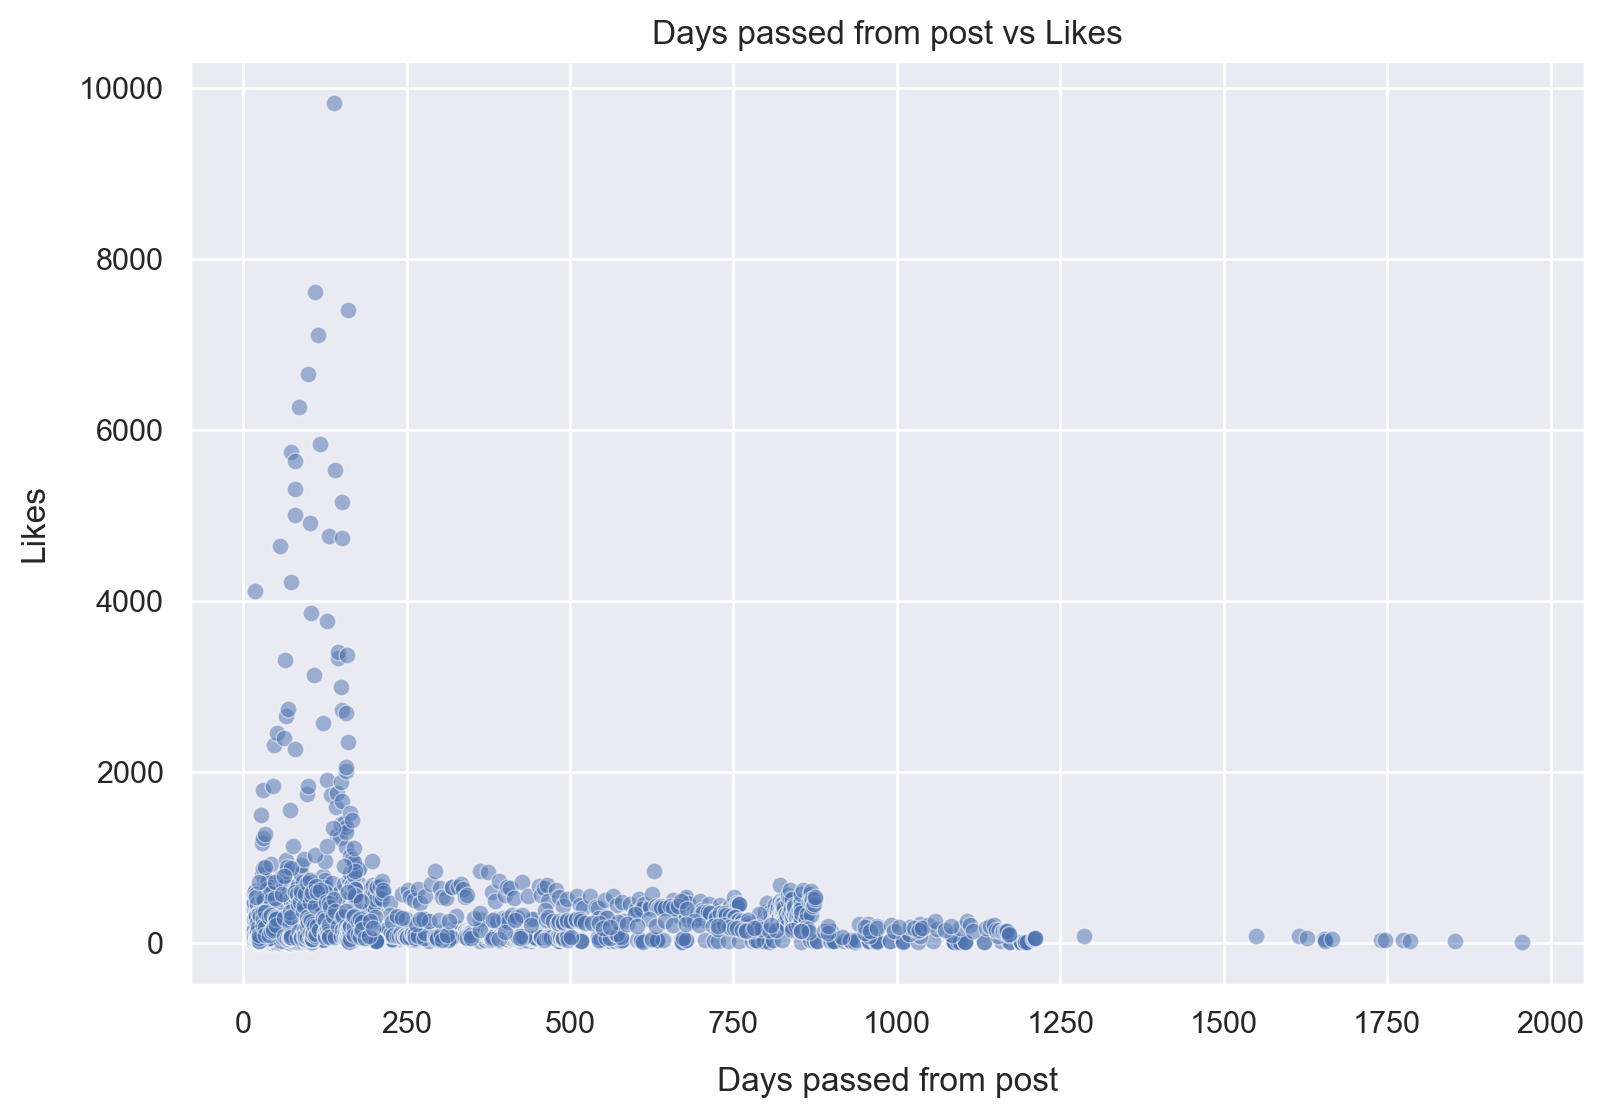

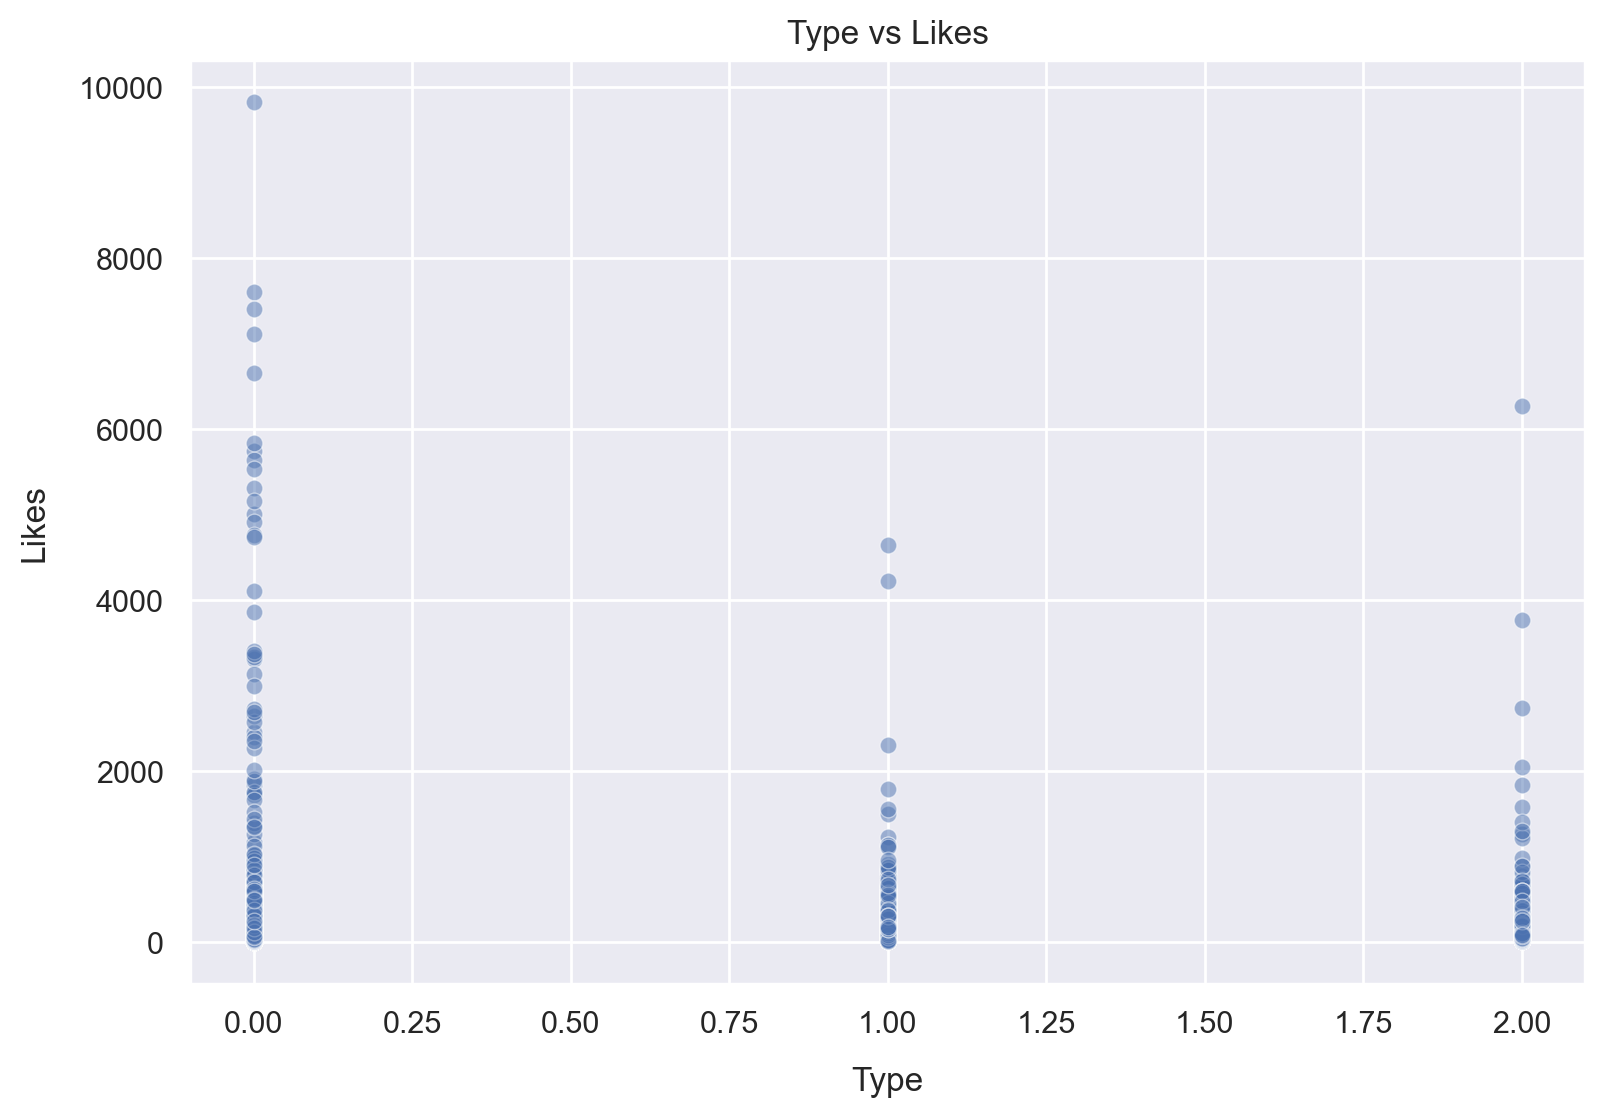

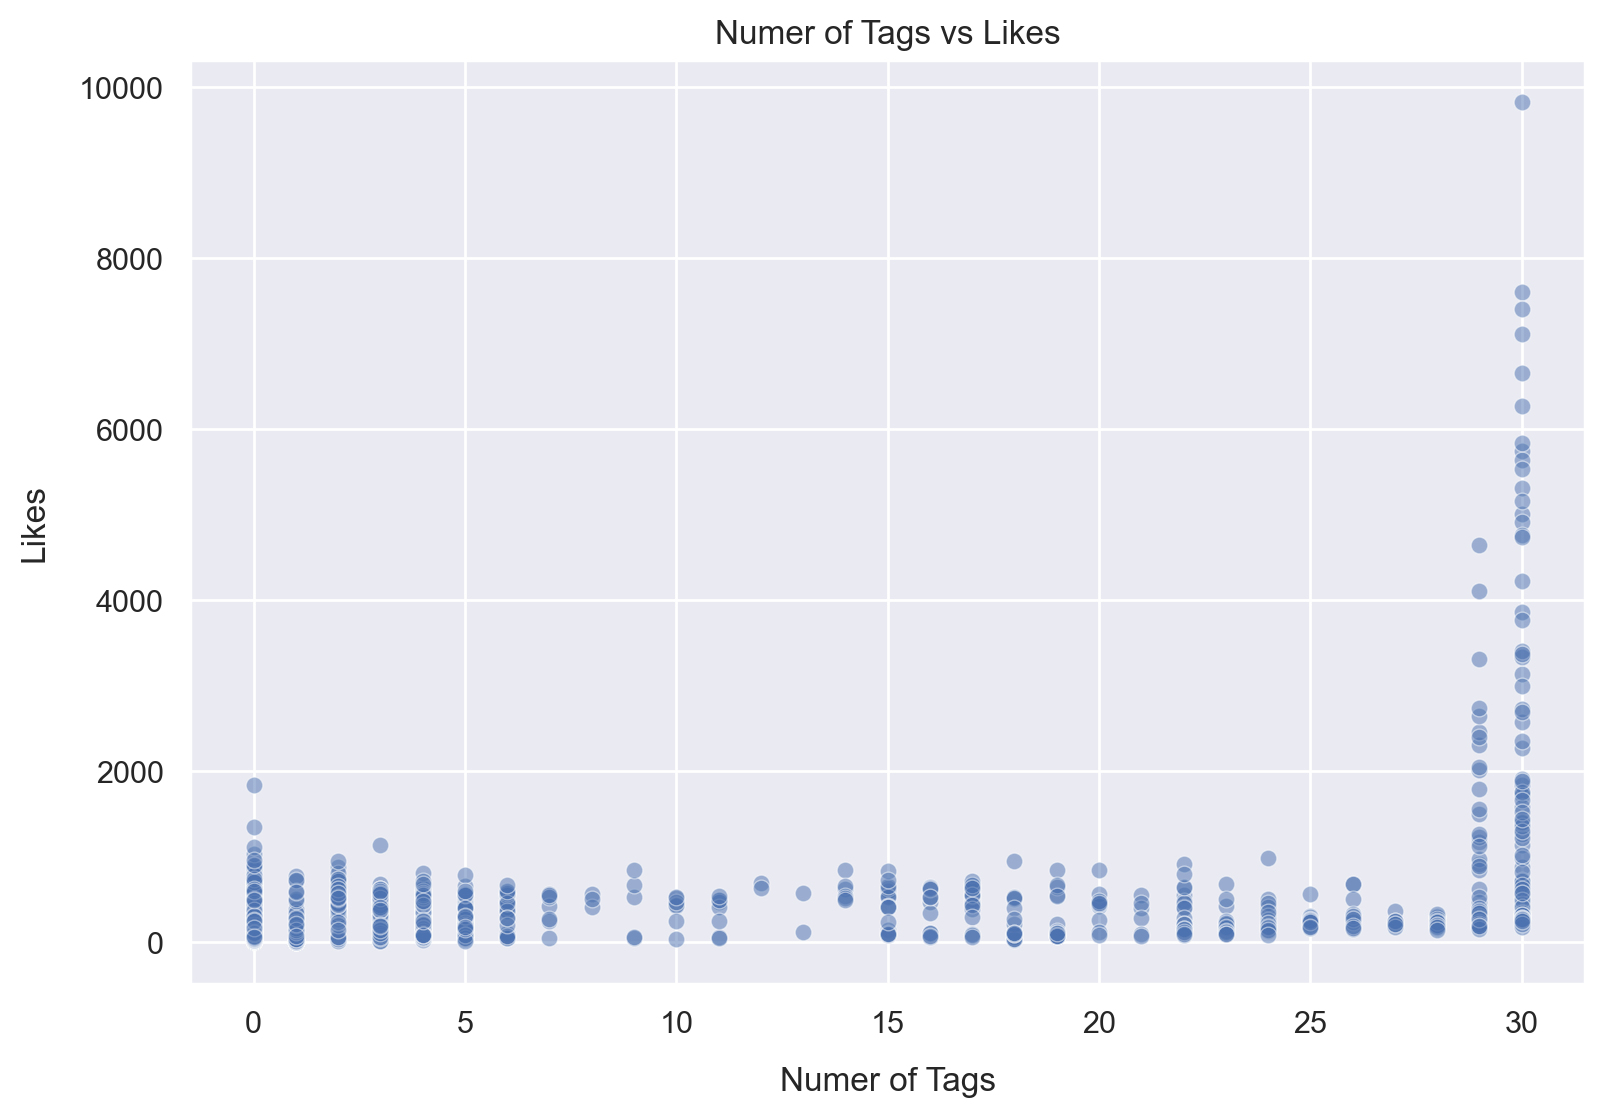

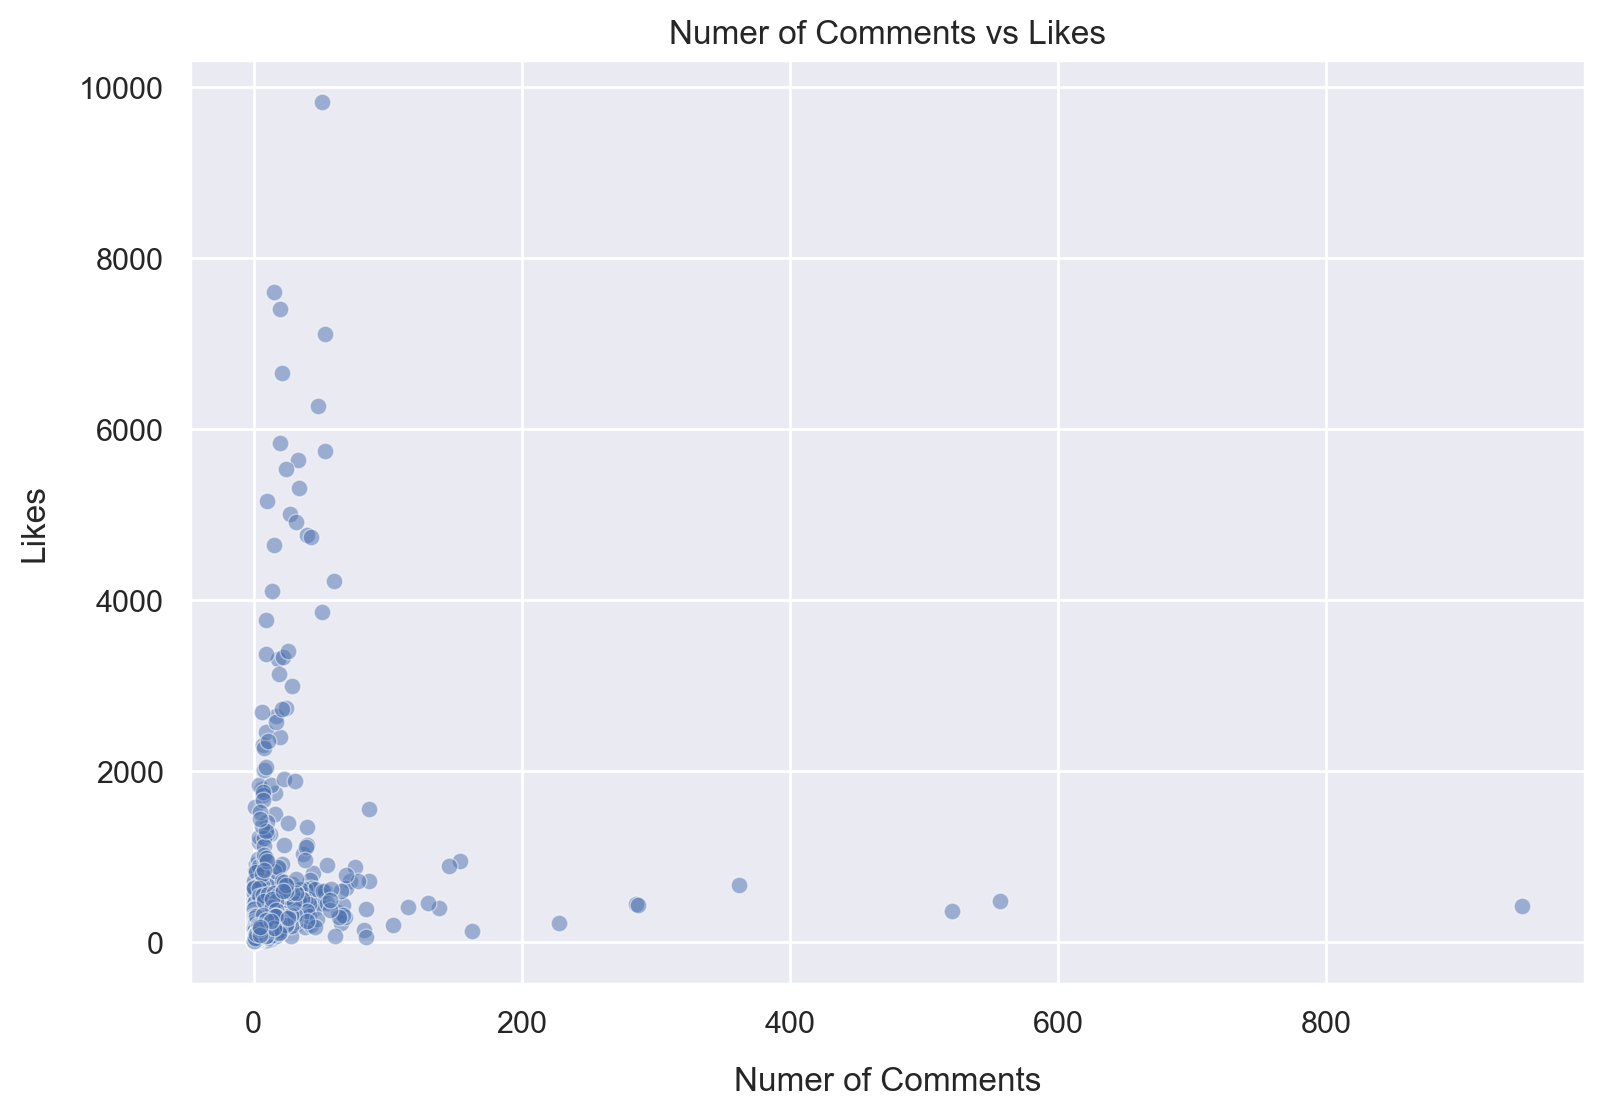

In [20]:

features = insta_df.drop('Likes', axis=1)

for feature in features.columns:
    sns.scatterplot(x=insta_df[feature], y=insta_df['Likes'], alpha=0.5)
    plt.title(f'{feature} vs Likes')
    plt.xlabel(feature)
    plt.ylabel('Likes')
    plt.show()

    14- From the above pairplot,

- It is observed that number of likes are more if the number of days passed are below 200

- The number of likes are more if the type is 'Image'

- The likes are proportional to number of tags. If the number of tags are more then likes are more

- There is no notable relation between comments and likes. Few posts has more likes for less comments

    15- Displaying the target distribution using histogram

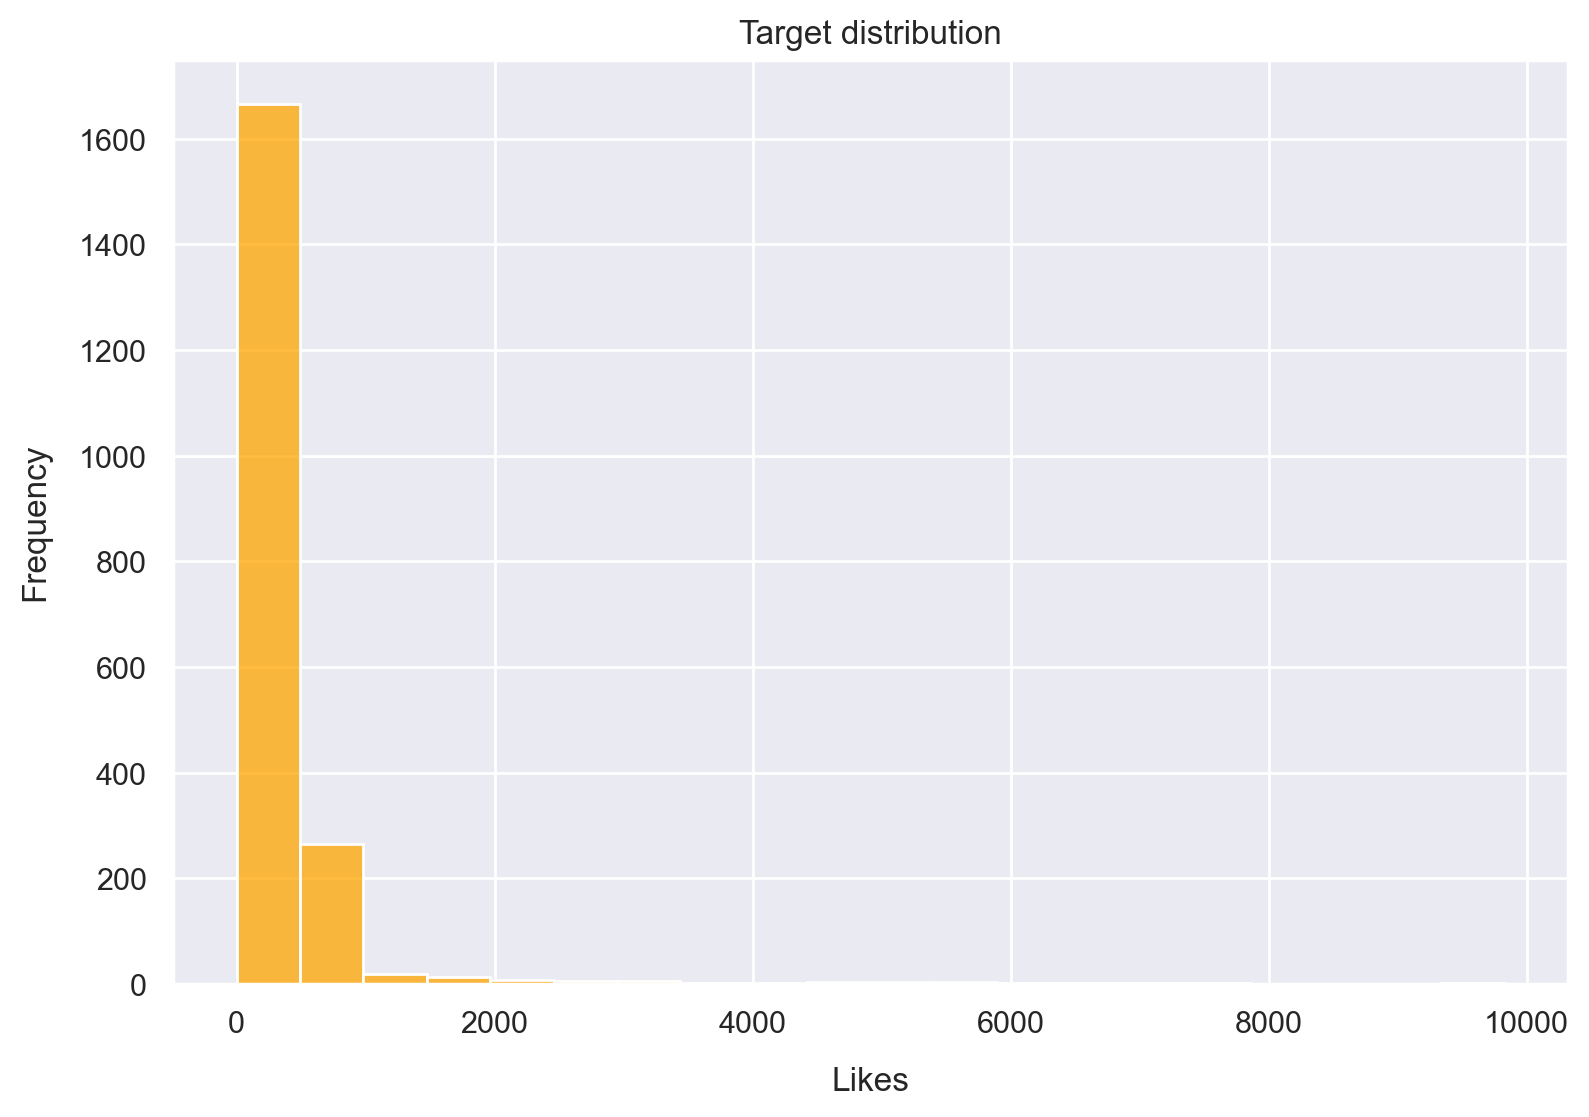

In [21]:

hist,bins=np.histogram(insta_df,bins=20)
sns.histplot(data=insta_df,x=insta_df['Likes'],bins=bins,kde=False,color='orange')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Target distribution')


plt.show()

    16- From the above histogram, 
    
-- The distribution of taget varaible is not normally distributed


-- The likes below 1000 has more frequency

    17-Transfering the target y into log to have the normal distributions: 

In [22]:

y=np.log(y)

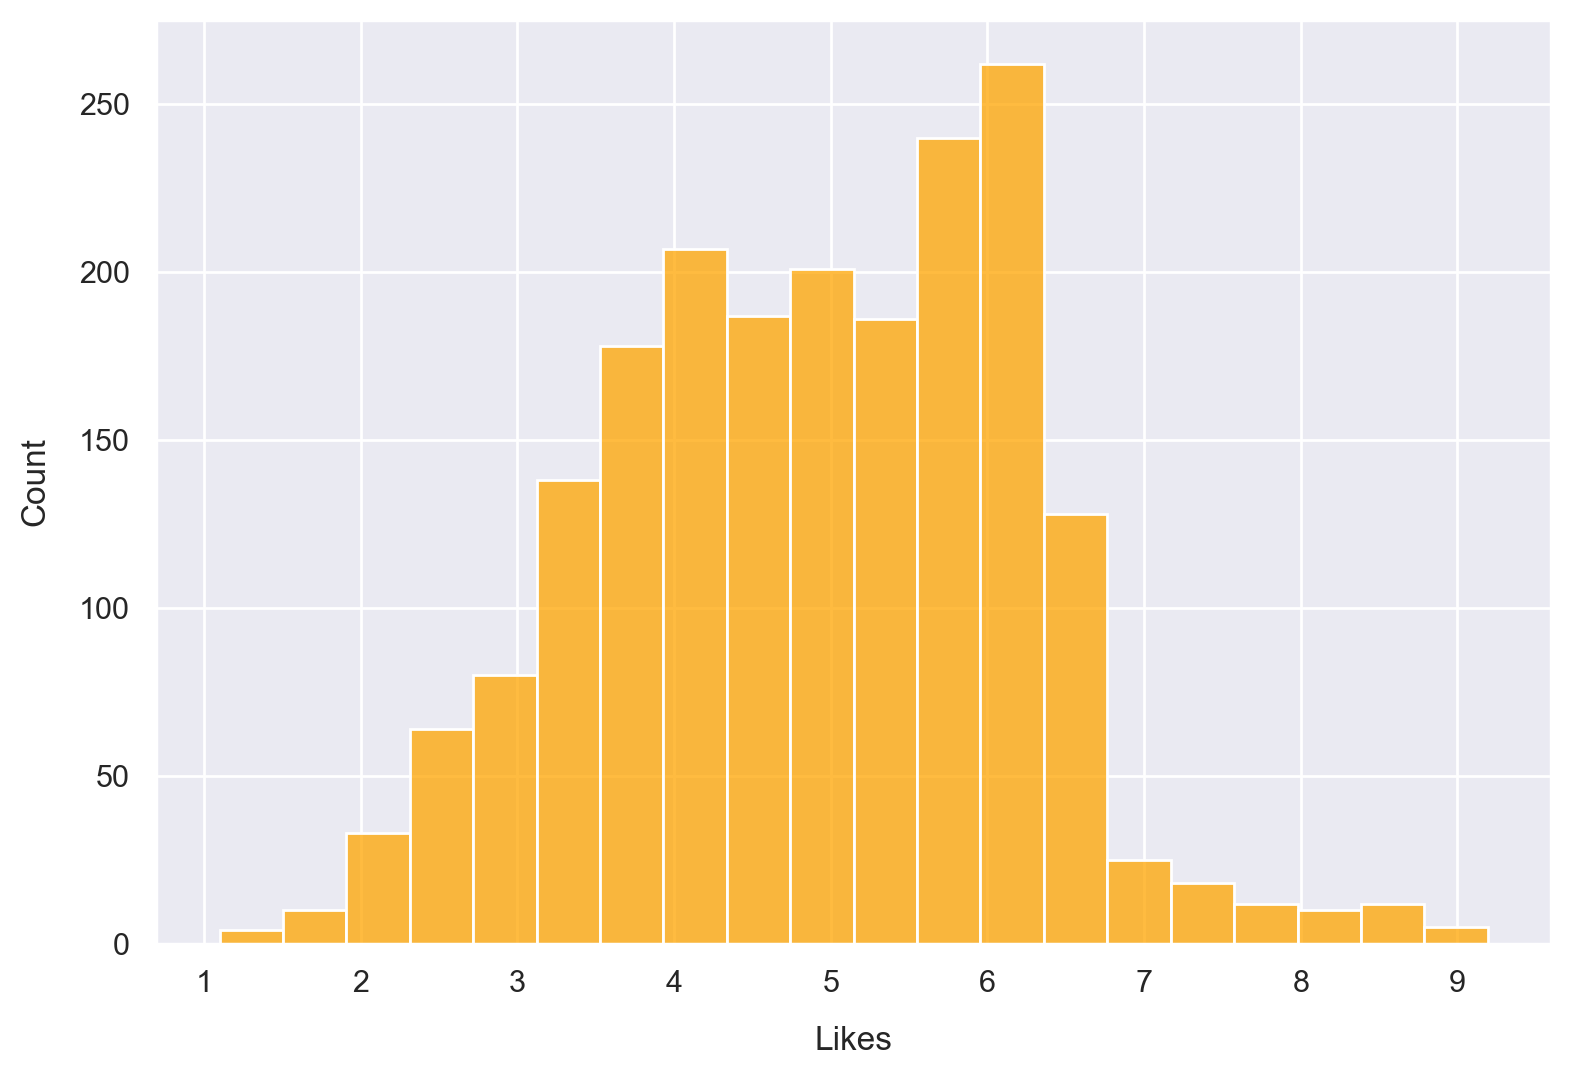

In [23]:
sns.histplot(data=y,x=y,bins=20,kde=False,color='orange')
plt.show()

- Now we can see that target column is normally distributed

In [24]:
y

0       6.226537
1       5.953243
2       5.921578
3       5.743003
4       6.240276
          ...   
1995    4.060443
1996    4.394449
1997    5.525453
1998    6.869014
1999    5.187386
Name: Likes, Length: 2000, dtype: float64

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. 
    

In [25]:
# Splitting the data:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1600, 4)
(400, 4)
(1600,)
(400,)


In [26]:
type(X_train)

pandas.core.frame.DataFrame

In [27]:
type(y_train)

pandas.core.series.Series

    19- Using Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Using k=10 and MSE as your metric)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one 
        

In [28]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2score1=r2_score(y_test,y_pred)
mse1=mean_squared_error(y_test,y_pred)
print("The R2 score is {}".format(r2score1))
print("The mse score is {}".format(mse1))

The R2 score is 0.20940711078231278
The mse score is 1.301221682154884


In [29]:

pipeline=make_pipeline(StandardScaler(),LinearRegression())




In [30]:

mse = cross_val_score(estimator=pipeline, X=X_train, y=y_train,cv=10,scoring='neg_mean_squared_error')
r2=cross_val_score(estimator=pipeline, X=X_train, y=y_train,cv=10)


In [31]:

print("Average 10-Fold CV R2 Score: {}".format((np.mean(r2)) ))
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(mse)) ))

Average 10-Fold CV R2 Score: 0.26848740062262266
Average 10-Fold CV MSE Score: 1.2696532496922268


    20- Hyperparameters tuning using GridSearchCV (Using k=10 and MSE as your metric):

        A. Ridge regression:
            * Finding out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression 
            * printing the best score and the best alpha value

In [32]:

from sklearn.linear_model import Ridge
alphas=np.logspace(-3,-2,1,2,3)
pipeline1=make_pipeline(StandardScaler(),Ridge())
param_grid = {'ridge__alpha': alphas}
grid_search=GridSearchCV(estimator=pipeline1,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10)
grid_search.fit(X_train,y_train)
best_score=grid_search.best_score_
best_alpha = grid_search.best_params_['ridge__alpha']
print("Best Score:", -best_score)  # Mean squared error is negated in GridSearchCV
print("Best Alpha:", best_alpha)

Best Score: 1.269651584891347
Best Alpha: 0.037037037037037035


        B. Lasso:
            * Finding out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. 
            * printing the best score and the best alpha value 

In [33]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-3,-2,1,2,3)
pipeline2=make_pipeline(StandardScaler(),Lasso())
param_grid={'lasso__alpha':alphas}
grid_search=GridSearchCV(estimator=pipeline2,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10)
grid_search.fit(X_train,y_train)
best_score=grid_search.best_score_
best_alpha = grid_search.best_params_['lasso__alpha']
print("Best Score:", -best_score)  # Mean squared error is negated in GridSearchCV
print("Best Alpha:", best_alpha)


Best Score: 1.266155801715524
Best Alpha: 0.037037037037037035


#### Robust regression

      21- Using Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module 
                * printing the absolute average MSE 

In [34]:

from sklearn.linear_model import HuberRegressor
pipeline3=make_pipeline(StandardScaler(),HuberRegressor())

In [35]:
mse_score =cross_val_score(estimator=pipeline3, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
r2score=cross_val_score(estimator=pipeline3, X=X_train, y=y_train, cv=10)
print("Average 10-Fold CV R2 Score: {}".format((np.mean(r2score)) ))
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(mse_score)) ))

Average 10-Fold CV R2 Score: 0.07577703618390556
Average 10-Fold CV MSE Score: 1.6378851316174736


        B.  The RANSAC regression model modle 
            * printing the absolute avarge MSE 

In [36]:

from sklearn.linear_model import RANSACRegressor
pipeline4=make_pipeline(StandardScaler(),RANSACRegressor())

In [37]:
mse_score =cross_val_score(estimator=pipeline4, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
r2score=cross_val_score(estimator=pipeline4, X=X_train, y=y_train, cv=10)
print("Average 10-Fold CV R2 Score: {}".format((np.mean(r2score)) ))
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(mse_score)) ))

Average 10-Fold CV R2 Score: -2.563307533205838
Average 10-Fold CV MSE Score: 11.571582830884065


    22- From the above models 


- Linear Regression,Lasso and Ridge regression performs better compared to Huber and RANSAC Regression


- Linear Regression, Lasso and Ridge are performing similar 

- So building model with Linear Regression


    23- Using the Best model to build/fit your final model using your train-data.

In [38]:

pipeline.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

    24- Predict the number of likes for test data and compute the MSE 

In [39]:

y_test=np.array(y_test).reshape(-1,1)



In [40]:
y_predict=pipeline.predict(X_test)
y_predict[:10]

array([4.74138589, 4.42471107, 6.61909701, 4.46687701, 4.56563808,
       4.67724979, 4.34083318, 4.46146715, 5.04098886, 6.54548774])

In [41]:
#computing mse
mse=mean_squared_error(y_test,y_predict)
print(mse)

1.3012216821548839


In [42]:

y_predict_df=pd.DataFrame(y_predict,columns=['y_predict'])
y_predict_df['test_likes']=y_test
y_predict_df.head(5)

,y_predict,test_likes
0,4.741386,5.181784
1,4.424711,4.941642
2,6.619097,7.916443
3,4.466877,5.332719
4,4.565638,4.276666


#### Fitting the model with huber regression

In [43]:
pipeline3.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('huberregressor', HuberRegressor())])

In [44]:
y_predict=pipeline3.predict(X_test)
y_predict[:10]

array([5.13598473, 4.36682197, 6.64513059, 4.38795872, 4.58401598,
       4.82987987, 4.18205153, 4.35454301, 5.27900546, 6.30732197])

In [45]:
#computing mse
mse=mean_squared_error(y_test,y_predict)
print(mse)

1.275250302520524


 From the above predictions using Linear Regression and cross-validation models it is observed that

- mse values of training and test are different for two models.

- LinearRegression model is working better on training set whereas Huber Regressor mse value is far less for test set than training

- By running only Linear Regression without pipleline and cross validation the mse value is 1.30 but with pipeline it 1.27

- Robust regression alogorithms are best if the data have outliers but our considered data doesnot have outliers
so they did not perform well compared to Linear Regression, Lasso and Ridge

- Lasso and Ridge are regularisation alogrithms which are useful to handle complex data, but our data has less features and less complexity
so they also did not improve the mse much better 

- Overfitting and underfitting problems can be addressed using cross validation techniques

- Linear Regression:

Linear regression is a method for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It aims to find the best-fitting line (or hyperplane) by minimizing the squared differences between observed and predicted values.

- Cross-Validation:

Cross-validation is a technique for assessing the performance of a predictive model by splitting the dataset into subsets, training the model on some subsets, and evaluating it on others. This process is repeated multiple times, allowing for a more reliable estimate of the model's performance and aiding in model selection and hyperparameter tuning

